# Data Loading and Libraries

In [ ]:
!pip install datasets pandas matplotlib seaborn transformers scipy scikit-learn

In [45]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.style.use('ggplot')

# Importing and Reading Data

In [3]:
dataset = load_dataset('maharshipandya/spotify-tracks-dataset')
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre'],
        num_rows: 114000
    })
})

In [4]:
df = pd.DataFrame(dataset["train"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
df.shape

(114000, 21)

In [6]:
df.describe()

Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

In [7]:
df.head(5)

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

# Data Preparation


In [8]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [9]:
df_sub = df[[
    #'track_id',
    'artists',
    #'album_name',
    #'track_name',
    'popularity',
    'duration_ms',
    'explicit',
    'danceability',
    'energy',
    #'key',
    'loudness',
    #'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    #'time_signature',
    'track_genre'
    ]].copy()

In [10]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   popularity        114000 non-null  int64  
 2   duration_ms       114000 non-null  int64  
 3   explicit          114000 non-null  bool   
 4   danceability      114000 non-null  float64
 5   energy            114000 non-null  float64
 6   loudness          114000 non-null  float64
 7   speechiness       114000 non-null  float64
 8   acousticness      114000 non-null  float64
 9   instrumentalness  114000 non-null  float64
 10  liveness          114000 non-null  float64
 11  valence           114000 non-null  float64
 12  tempo             114000 non-null  float64
 13  track_genre       114000 non-null  object 
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 11.4+ MB


In [11]:
df_sub.isnull().sum()

artists             1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre         0
dtype: int64

In [12]:
df_sub['artists'].fillna(value='Unknown', inplace=True)

In [13]:
df_sub.duplicated().sum()

7082

In [ ]:
df_sub.loc[df_sub.duplicated()]

In [15]:
df_sub = df_sub.drop_duplicates()

In [16]:
df_sub.reset_index(drop=True)

artists  popularity  duration_ms  explicit  \
0                  Gen Hoshino          73       230666     False   
1                 Ben Woodward          55       149610     False   
2       Ingrid Michaelson;ZAYN          57       210826     False   
3                 Kina Grannis          71       201933     False   
4             Chord Overstreet          82       198853     False   
...                        ...         ...          ...       ...   
106913           Rainy Lullaby          21       384999     False   
106914           Rainy Lullaby          22       385000     False   
106915           Cesária Evora          22       271466     False   
106916        Michael W. Smith          41       283893     False   
106917           Cesária Evora          22       241826     False   

        danceability  energy  loudness  speechiness  acousticness  \
0              0.676  0.4610    -6.746       0.1430        0.0322   
1              0.420  0.1660   -17.235       0.0763        0.9240   
2              0.438  0.3590    -9.734       0.0557        0.2100   
3              0.266  0.0596   -18.515       0.0363        0.9050   
4              0.618  0.4430    -9.681       0.0526        0.4690   
...              ...     ...       ...          ...           ...   
106913         0.172  0.2350   -16.393       0.0422        0.6400   
106914         0.174  0.1170   -18.318       0.0401        0.9940   
106915         0.629  0.3290   -10.895       0.0420        0.8670   
106916         0.587  0.5060   -10.889       0.0297        0.3810   
106917         0.526  0.4870   -10.204       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  track_genre  
0               0.000001    0.3580   0.7150   87.917     acoustic  
1               0.000006    0.1010   0.2670   77.489     acoustic  
2               0.000000    0.1170   0.1200   76.332     acoustic  
3               0.000071    0.1320   0.1430  181.740     acoustic  
4               0.000000    0.0829   0.1670  119.949     acoustic  
...                  ...       ...      ...      ...          ...  
106913          0.928000    0.0863   0.0339  125.995  world-music  
106914          0.976000    0.1050   0.0350   85.239  world-music  
106915          0.000000    0.0839   0.7430  132.378  world-music  
106916          0.000000    0.2700   0.4130  135.960  world-music  
106917          0.000000    0.0893   0.7080   79.198  world-music  

[106918 rows x 14 columns]

In [17]:
df_sub.shape

(106918, 14)

# Feature Understanding

In [37]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = StandardScaler()

# # Select only numerical columns for normalization
# numerical_cols = ['popularity', 'duration_ms', 'danceability','energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo']
# df_numerical = df_sub[numerical_cols]

# df_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

In [29]:
df_sub['duration_minutes'] = (df_sub['duration_ms'] / 1000 / 60).round(2)

In [30]:
df_sub.head()

artists  popularity  duration_ms  explicit  danceability  \
0             Gen Hoshino          73       230666     False         0.676   
1            Ben Woodward          55       149610     False         0.420   
2  Ingrid Michaelson;ZAYN          57       210826     False         0.438   
3            Kina Grannis          71       201933     False         0.266   
4        Chord Overstreet          82       198853     False         0.618   

   energy  loudness  speechiness  acousticness  instrumentalness  liveness  \
0  0.4610    -6.746       0.1430        0.0322          0.000001    0.3580   
1  0.1660   -17.235       0.0763        0.9240          0.000006    0.1010   
2  0.3590    -9.734       0.0557        0.2100          0.000000    0.1170   
3  0.0596   -18.515       0.0363        0.9050          0.000071    0.1320   
4  0.4430    -9.681       0.0526        0.4690          0.000000    0.0829   

   valence    tempo track_genre  duration_minutes  
0    0.715   87.917    acoustic              3.84  
1    0.267   77.489    acoustic              2.49  
2    0.120   76.332    acoustic              3.51  
3    0.143  181.740    acoustic              3.37  
4    0.167  119.949    acoustic              3.31

Text(nan, 0.5, 'Number of Songs')

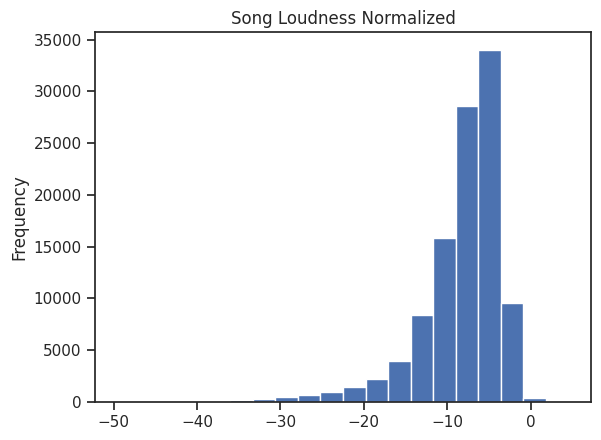

In [48]:
plt.clf()
plt.cla()

df_sub['loudness'].plot(kind='hist',
                               bins=20,
                               title='Song Loudness')
ax.set_xlabel('Loudness')
ax.set_ylabel('Number of Songs')

Text(nan, 0.5, 'Number of Songs')

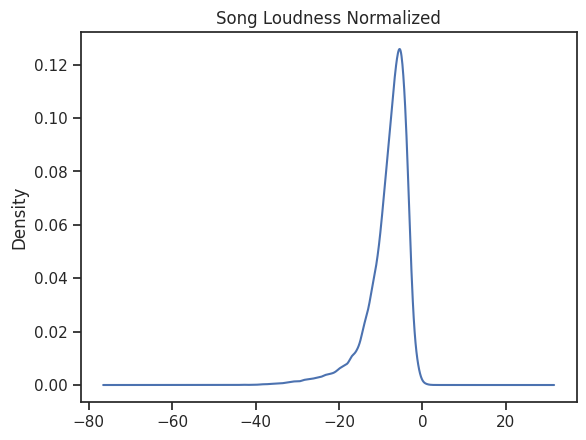

In [49]:
df_sub['loudness'].plot(kind='kde',title='Song Loudness Normalized')
ax.set_xlabel('Loudness')
ax.set_ylabel('Number of Songs')

# Feature Relationships

In [50]:
df_sub.columns

Index(['artists', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_genre', 'duration_minutes'],
      dtype='object')

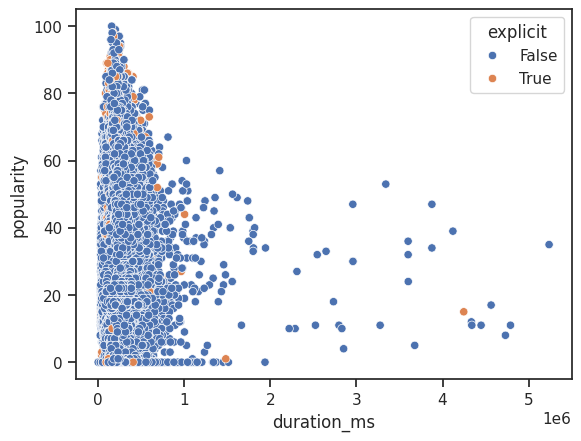

In [53]:
sns.scatterplot( x ='duration_ms',
                y = 'popularity',
                hue = 'explicit',
                data=df_sub)
ax.set_title('Song Duration vs Popularity')
plt.show()

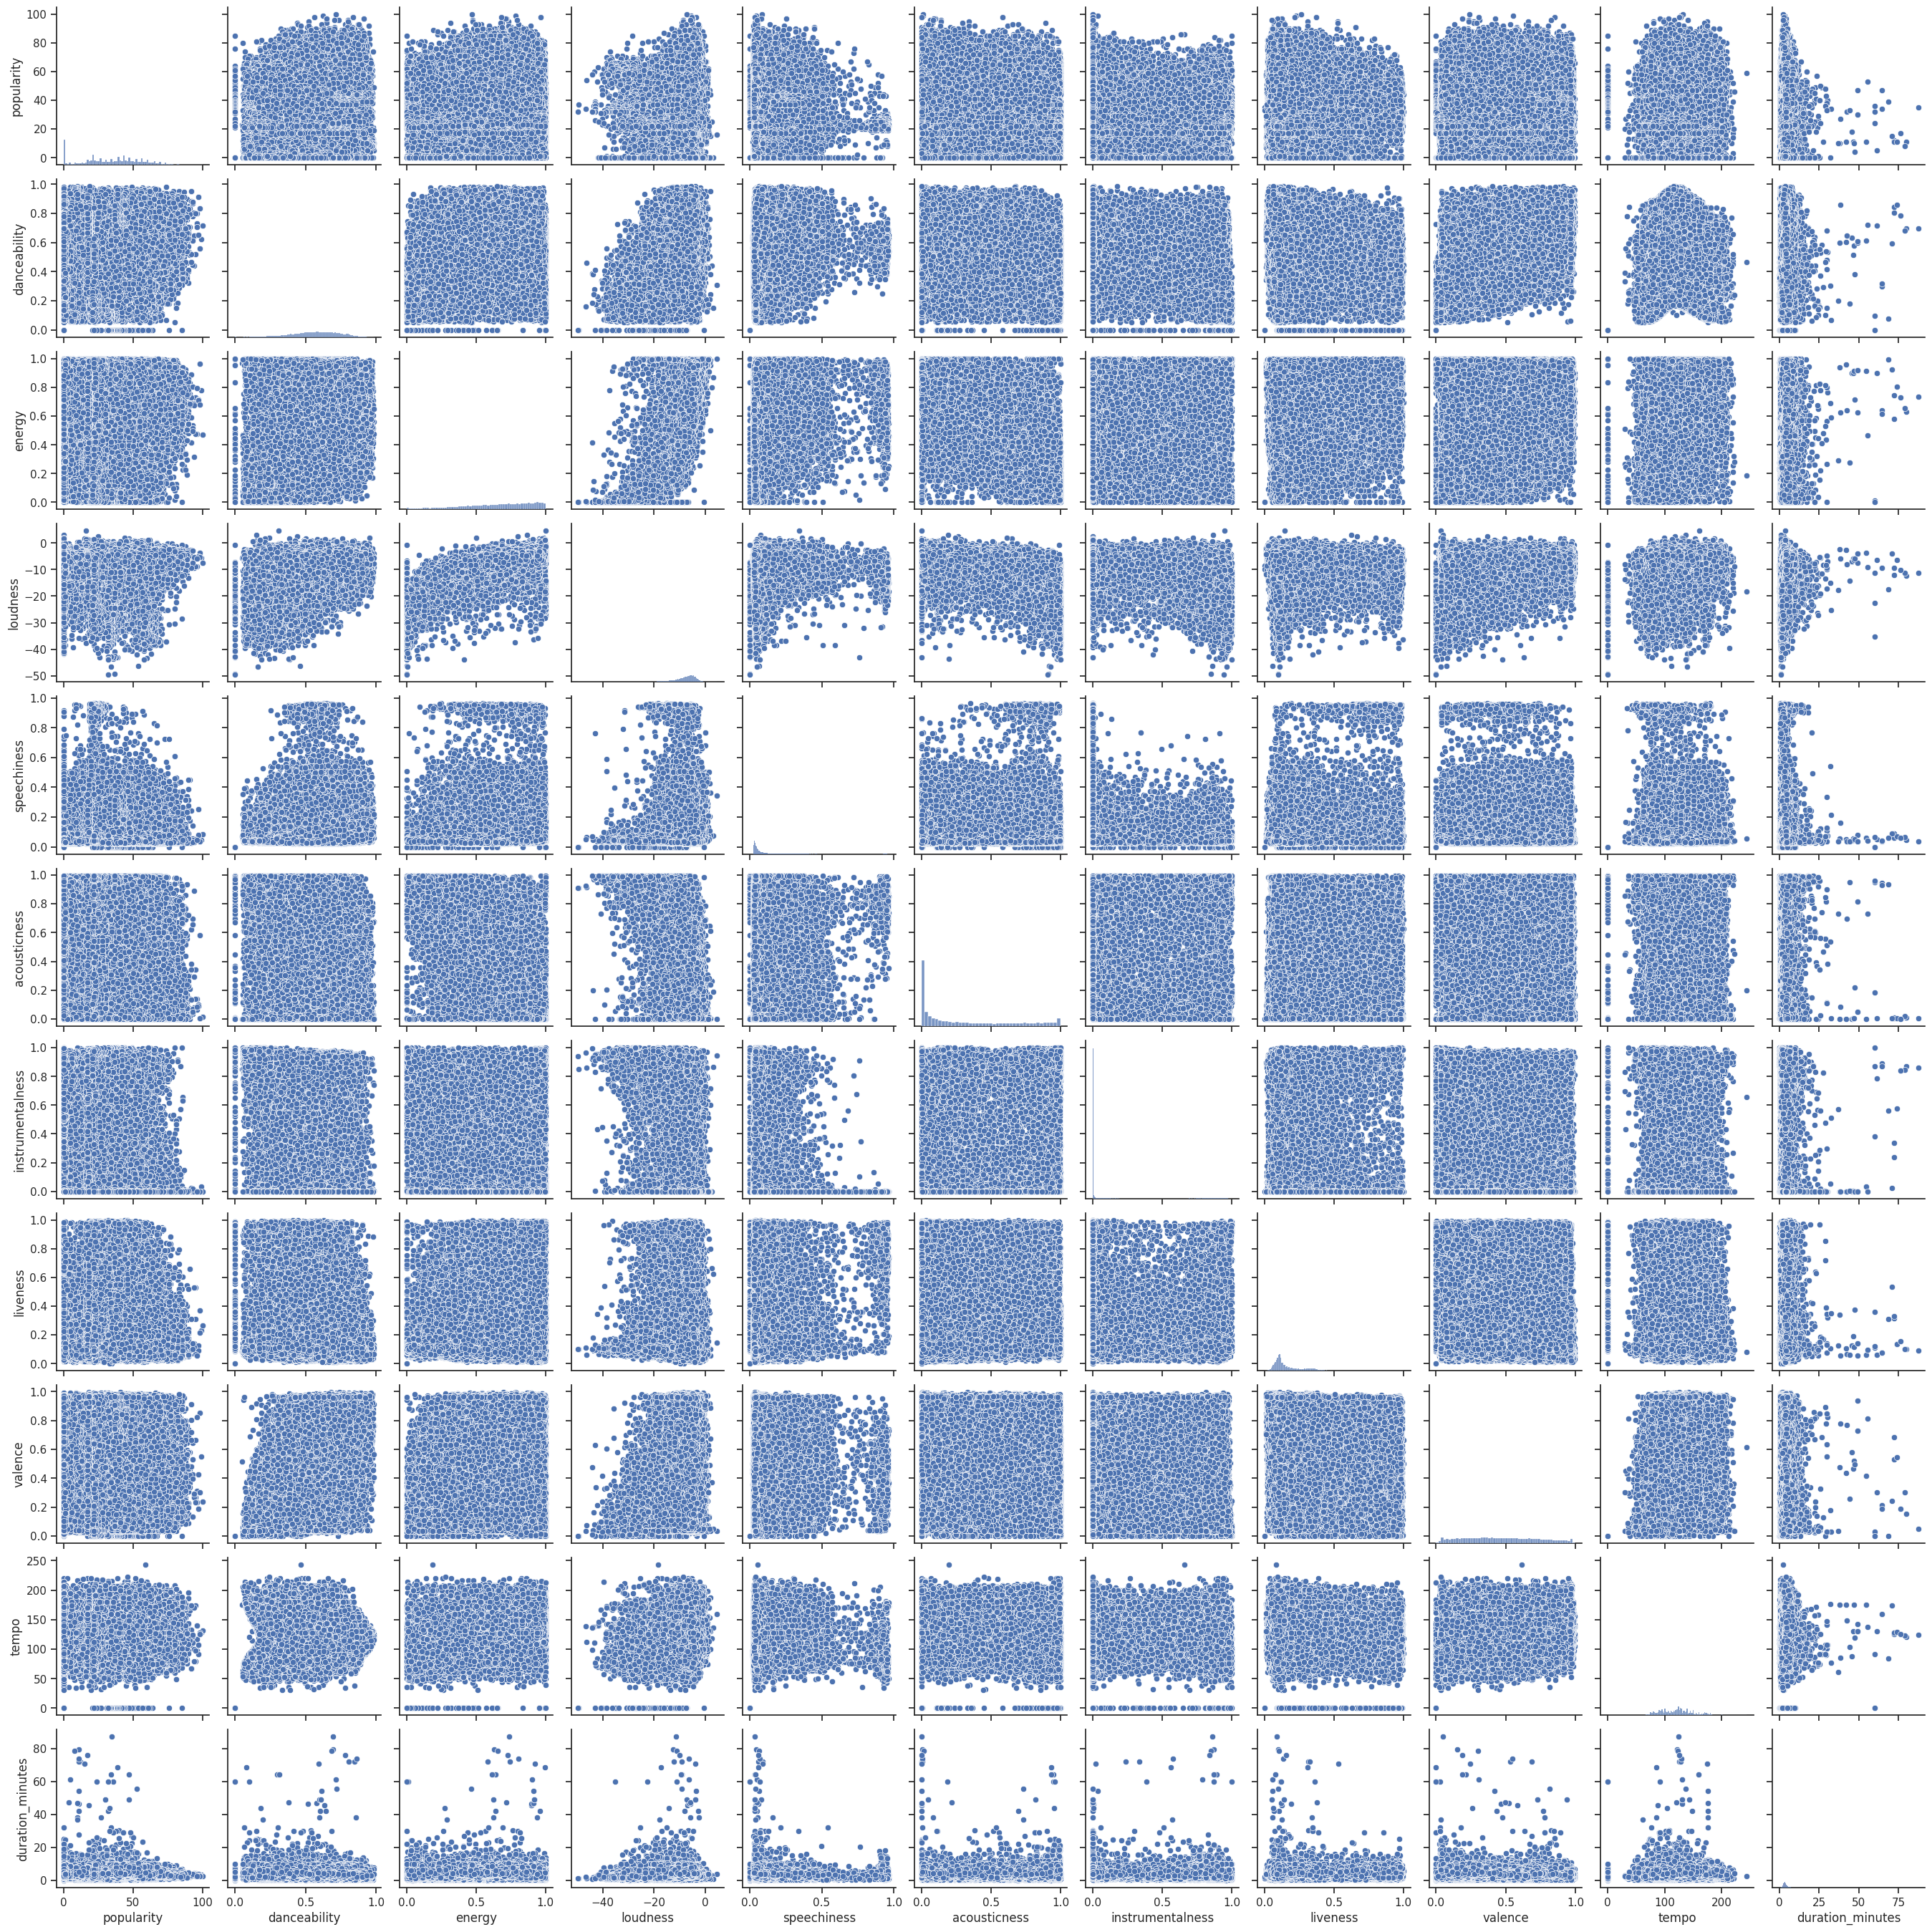

In [54]:
sns.pairplot(df_sub, vars=['popularity', 'danceability','energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo',  'duration_minutes'])
plt.show()

<ipython-input-58-9d54542ed22a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')


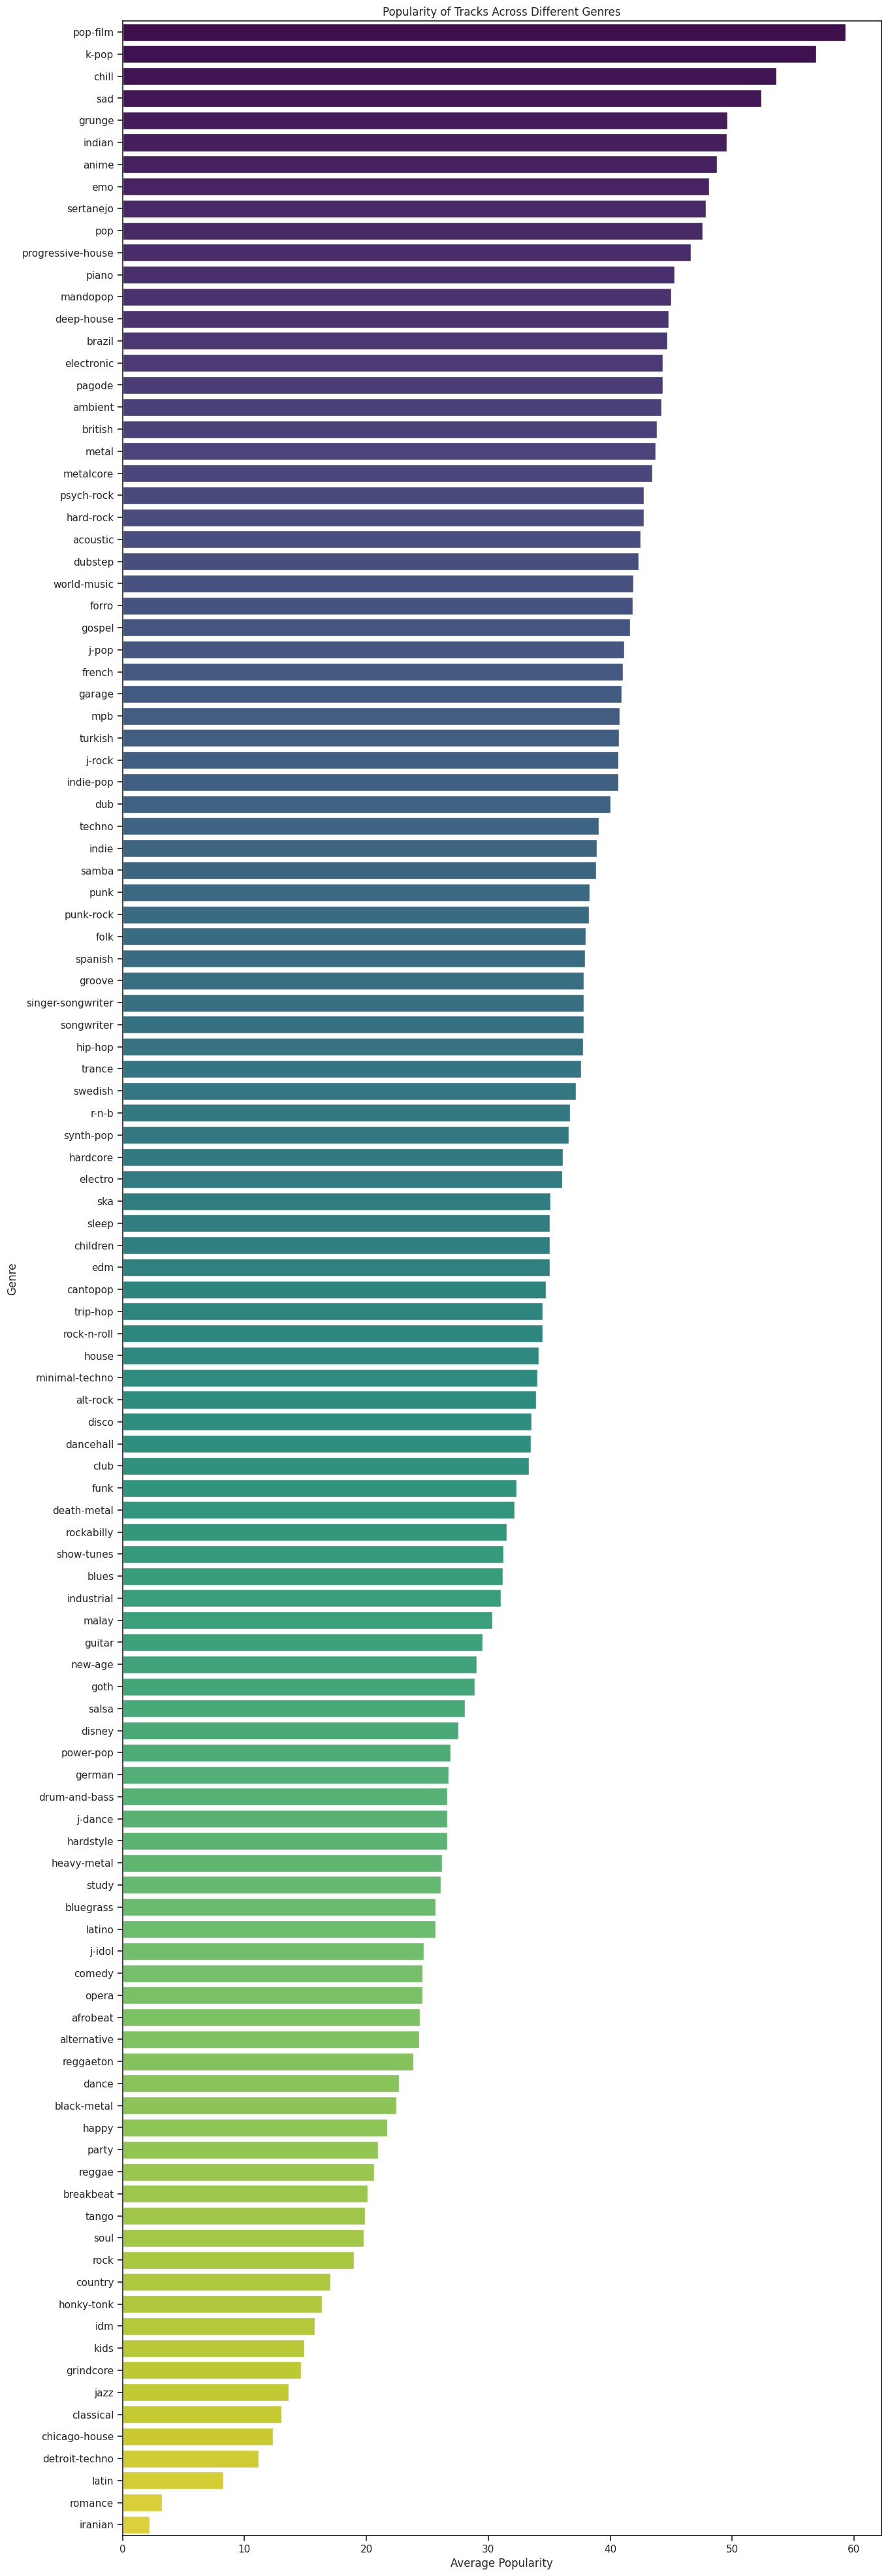

In [58]:
# Group the data by genre and calculate average popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 50))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')

# Set labels
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Popularity of Tracks Across Different Genres')

plt.show()

In [55]:
df_sub.corr()

<ipython-input-55-f1db017032ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub.corr()


popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.037630  0.052096      0.056835 -0.007493   
duration_ms        -0.037630     1.000000 -0.067847     -0.070408  0.056706   
explicit            0.052096    -0.067847  1.000000      0.111942  0.096733   
danceability        0.056835    -0.070408  0.111942      1.000000  0.121998   
energy             -0.007493     0.056706  0.096733      0.121998  1.000000   
loudness            0.071697    -0.000655  0.106925      0.247888  0.762201   
speechiness        -0.061678    -0.066108  0.314564      0.105706  0.139928   
acousticness       -0.023307    -0.103326 -0.086640     -0.160067 -0.734168   
instrumentalness   -0.142929     0.118121 -0.105799     -0.180004 -0.182963   
liveness           -0.022760     0.007624  0.035321     -0.132300  0.185137   
valence            -0.014589    -0.148570 -0.002114      0.475981  0.254992   
tempo               0.002527     0.022645 -0.004978     -0.046151  0.247262   
duration_minutes   -0.037629     0.999999 -0.067842     -0.070405  0.056701   

                  loudness  speechiness  acousticness  instrumentalness  \
popularity        0.071697    -0.061678     -0.023307         -0.142929   
duration_ms      -0.000655    -0.066108     -0.103326          0.118121   
explicit          0.106925     0.314564     -0.086640         -0.105799   
danceability      0.247888     0.105706     -0.160067         -0.180004   
energy            0.762201     0.139928     -0.734168         -0.182963   
loudness          1.000000     0.058869     -0.589236         -0.431867   
speechiness       0.058869     1.000000      0.001021         -0.093395   
acousticness     -0.589236     0.001021      1.000000          0.102477   
instrumentalness -0.431867    -0.093395      0.102477          1.000000   
liveness          0.079206     0.207387     -0.019464         -0.086308   
valence           0.276080     0.036033     -0.105677         -0.323718   
tempo             0.216131     0.010518     -0.209817         -0.052402   
duration_minutes -0.000658    -0.066104     -0.103332          0.118120   

                  liveness   valence     tempo  duration_minutes  
popularity       -0.022760 -0.014589  0.002527         -0.037629  
duration_ms       0.007624 -0.148570  0.022645          0.999999  
explicit          0.035321 -0.002114 -0.004978         -0.067842  
danceability     -0.132300  0.475981 -0.046151         -0.070405  
energy            0.185137  0.254992  0.247262          0.056701  
loudness          0.079206  0.276080  0.216131         -0.000658  
speechiness       0.207387  0.036033  0.010518         -0.066104  
acousticness     -0.019464 -0.105677 -0.209817         -0.103332  
instrumentalness -0.086308 -0.323718 -0.052402          0.118120  
liveness          1.000000  0.020460 -0.003268          0.007627  
valence           0.020460  1.000000  0.079930         -0.148564  
tempo            -0.003268  0.079930  1.000000          0.022642  
duration_minutes  0.007627 -0.148564  0.022642          1.000000

<ipython-input-56-a8661747f434>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_sub.corr()


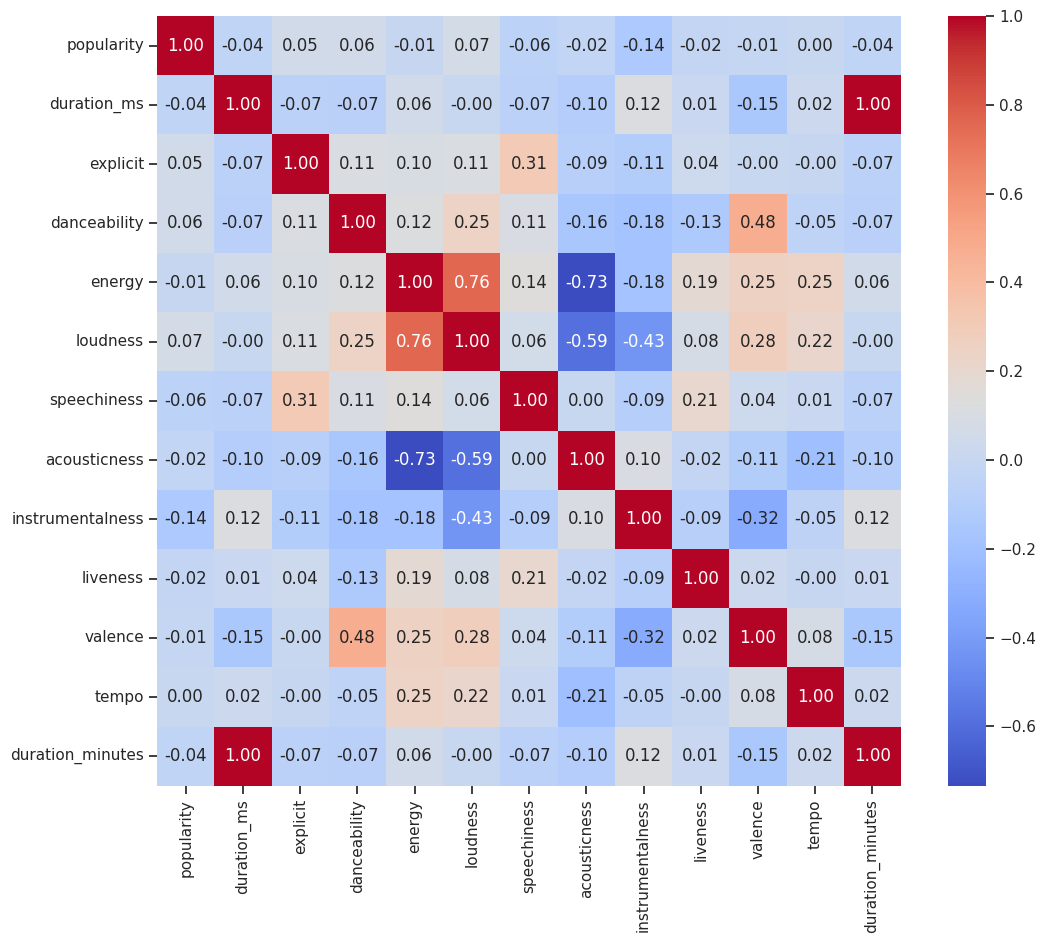

In [56]:
# Calculate correlation matrix
corr = df_sub.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Asking question about Data and Hypothesis testing

In [59]:
import scipy.stats as stats

# Let's say we want to compare the popularity of explicit and non-explicit tracks
explicit = df[df['explicit'] == 1]['popularity']
non_explicit = df[df['explicit'] == 0]['popularity']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(explicit, non_explicit)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 14.89806670996585
P-value: 3.782726624894434e-50


In [60]:
# Calculate the correlation
correlation, p_value = stats.pearsonr(df_sub['loudness'], df_sub['energy'])

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: 0.7622011367619086
P-value: 0.0


In [61]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['explicit'], df['mode'])

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-square statistic: 157.58527973940852
P-value: 3.812940306558429e-36


In [62]:
contingency_table = pd.crosstab(df['explicit'], df['mode'])
print(contingency_table)


mode          0      1
explicit              
False     37216  67037
True       4103   5644


In [63]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(expected)

[[37786.2255 66466.7745]
 [ 3532.7745  6214.2255]]
